# 23장 판다스로 데이터 탐험하기

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/python4daml/blob/main/23장.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

In [1]:
import matplotlib.pyplot as plt

#선 두께
plt.rcParams['lines.linewidth'] = 4
#제목 폰트 크기
plt.rcParams['axes.titlesize'] = 16
#축 레이블 폰트 크기
plt.rcParams['axes.labelsize'] = 16
#x 축 텍스트 크기
plt.rcParams['xtick.labelsize'] = 16
#y 축 텍스트 크기
plt.rcParams['ytick.labelsize'] = 16
#x 축 눈금 크기
plt.rcParams['xtick.major.size'] = 7
#y 축 눈금 크기
plt.rcParams['ytick.major.size'] = 7
#마커 크기
plt.rcParams['lines.markersize'] = 10
#범례를 표시할 때 마커 표시 개수
plt.rcParams['legend.numpoints'] = 1
#범례 텍스트 크기
plt.rcParams['legend.fontsize'] = 14

# 한글 폰트 사용을 위한 코드입니다.
import sys
# 코랩의 경우 나눔 폰트를 설치합니다.
if 'google.colab' in sys.modules:
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

# 나눔 폰트를 사용합니다.
import matplotlib 

matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# 코랩의 경우 필요한 데이터를 깃허브에서 다운로드합니다.
if 'google.colab' in sys.modules:
    import gdown
    gdown.download('https://raw.githubusercontent.com/rickiepark/python4daml/main/wwc2019_q-f.csv', quiet=False)
    gdown.download('https://raw.githubusercontent.com/rickiepark/python4daml/main/global-fossil-fuel-consumption.csv', quiet=False)
    gdown.download('https://raw.githubusercontent.com/rickiepark/python4daml/main/US_temperatures.csv', quiet=False)

Downloading...
From: https://raw.githubusercontent.com/rickiepark/python4daml/main/wwc2019_q-f.csv
To: /content/wwc2019_q-f.csv
259B [00:00, 285kB/s]                    
Downloading...
From: https://raw.githubusercontent.com/rickiepark/python4daml/main/global-fossil-fuel-consumption.csv
To: /content/global-fossil-fuel-consumption.csv
2.25kB [00:00, 2.46MB/s]                   
Downloading...
From: https://raw.githubusercontent.com/rickiepark/python4daml/main/US_temperatures.csv
To: /content/US_temperatures.csv
2.42MB [00:00, 48.4MB/s]                  


## 23.1 데이터프레임과 CSV 파일

In [2]:
import pandas as pd 
wwc = pd.read_csv('wwc2019_q-f.csv') 
print(wwc)

          Round       Winner  W Goals        Loser  L Goals
0      Quarters      England        3       Norway        0
1      Quarters          USA        2       France        1
2      Quarters  Netherlands        2        Italy        0
3      Quarters       Sweden        2      Germany        1
4         Semis          USA        2      England        1
5         Semis  Netherlands        1       Sweden        0
6     3rd Place       Sweden        2      England        1
7  Championship          USA        2  Netherlands        0


In [3]:
for i in wwc.index: 
    print(i)

0
1
2
3
4
5
6
7


In [4]:
for c in wwc.columns: 
    print(c) 

Round
Winner
W Goals
Loser
L Goals


In [5]:
print(wwc.values)

[['Quarters' 'England' 3 'Norway' 0]
 ['Quarters' 'USA' 2 'France' 1]
 ['Quarters' 'Netherlands' 2 'Italy' 0]
 ['Quarters' 'Sweden' 2 'Germany' 1]
 ['Semis' 'USA' 2 'England' 1]
 ['Semis' 'Netherlands' 1 'Sweden' 0]
 ['3rd Place' 'Sweden' 2 'England' 1]
 ['Championship' 'USA' 2 'Netherlands' 0]]


In [6]:
wwc.shape

(8, 5)

## 23.2 시리즈와 데이터프레임 만들기

In [7]:
print(pd.DataFrame())

Empty DataFrame
Columns: []
Index: []


In [8]:
rounds = ['Semis', 'Semis', '3rd Place', 'Championship'] 
print(pd.DataFrame(rounds)) 

              0
0         Semis
1         Semis
2     3rd Place
3  Championship


In [9]:
print(pd.DataFrame({'Round': rounds}))

          Round
0         Semis
1         Semis
2     3rd Place
3  Championship


In [10]:
rounds = ['Semis', 'Semis', '3rd Place', 'Championship'] 
teams = ['USA', 'Netherlands', 'Sweden', 'USA'] 
df = pd.DataFrame({'Round': rounds, 'Winner': teams}) 
print(df) 

          Round       Winner
0         Semis          USA
1         Semis  Netherlands
2     3rd Place       Sweden
3  Championship          USA


In [11]:
df['W Goals'] = [2, 1, 0, 0]
print(df)

          Round       Winner  W Goals
0         Semis          USA        2
1         Semis  Netherlands        1
2     3rd Place       Sweden        0
3  Championship          USA        0


In [12]:
df['W Goals'] = [2, 1, 2, 2]
print(df)

          Round       Winner  W Goals
0         Semis          USA        2
1         Semis  Netherlands        1
2     3rd Place       Sweden        2
3  Championship          USA        2


In [13]:
print(df.drop('Winner', axis = 'columns'))

          Round  W Goals
0         Semis        2
1         Semis        1
2     3rd Place        2
3  Championship        2


In [14]:
quarters_dict = {'Round': ['Quarters']*4, 
                 'Winner': ['England', 'USA', 'Netherlands', 'Sweden'], 
                 'W Goals': [3, 2, 2, 2]} 
df = pd.concat([pd.DataFrame(quarters_dict), df], sort = False) 
print(df)

          Round       Winner  W Goals
0      Quarters      England        3
1      Quarters          USA        2
2      Quarters  Netherlands        2
3      Quarters       Sweden        2
0         Semis          USA        2
1         Semis  Netherlands        1
2     3rd Place       Sweden        2
3  Championship          USA        2


In [15]:
pd.concat([pd.DataFrame(quarters_dict), df], sort = True)

,Round,W Goals,Winner
0,Quarters,3,England
1,Quarters,2,USA
2,Quarters,2,Netherlands
3,Quarters,2,Sweden
0,Quarters,3,England
1,Quarters,2,USA
2,Quarters,2,Netherlands
3,Quarters,2,Sweden
0,Semis,2,USA
1,Semis,1,Netherlands


In [16]:
df.reset_index(drop = True)

,Round,Winner,W Goals
0,Quarters,England,3
1,Quarters,USA,2
2,Quarters,Netherlands,2
3,Quarters,Sweden,2
4,Semis,USA,2
5,Semis,Netherlands,1
6,3rd Place,Sweden,2
7,Championship,USA,2


In [17]:
df.reset_index(drop = False)

,index,Round,Winner,W Goals
0,0,Quarters,England,3
1,1,Quarters,USA,2
2,2,Quarters,Netherlands,2
3,3,Quarters,Sweden,2
4,0,Semis,USA,2
5,1,Semis,Netherlands,1
6,2,3rd Place,Sweden,2
7,3,Championship,USA,2


In [18]:
df.set_index('Round')

,Winner,W Goals
Round,,
Quarters,England,3
Quarters,USA,2
Quarters,Netherlands,2
Quarters,Sweden,2
Semis,USA,2
Semis,Netherlands,1
3rd Place,Sweden,2
Championship,USA,2


## 23.3 열과 행 선택하기

In [19]:
wwc['Winner']

0        England
1            USA
2    Netherlands
3         Sweden
4            USA
5    Netherlands
6         Sweden
7            USA
Name: Winner, dtype: object

In [20]:
winners = '' 
for w in wwc['Winner']: 
    winners += w + ',' 
print(winners[:-1]) 

England,USA,Netherlands,Sweden,USA,Netherlands,Sweden,USA


**뇌풀기 문제**

In [21]:
def sum_of_columns(df, col_label):
    """df는 데이터프레임이고 col_label은 정수 타입 열의 레이블이라고 가정합니다.
       col_label 열 값의 합을 반환합니다"""
    sum = 0
    for v in df[col_label]:
        sum += v
    return sum

sum_of_columns(df, 'W Goals')

16

In [22]:
wwc[['Winner', 'Loser']]

,Winner,Loser
0,England,Norway
1,USA,France
2,Netherlands,Italy
3,Sweden,Germany
4,USA,England
5,Netherlands,Sweden
6,Sweden,England
7,USA,Netherlands


In [23]:
wwc[['Round','Winner','Loser','W Goals','L Goals']]

,Round,Winner,Loser,W Goals,L Goals
0,Quarters,England,Norway,3,0
1,Quarters,USA,France,2,1
2,Quarters,Netherlands,Italy,2,0
3,Quarters,Sweden,Germany,2,1
4,Semis,USA,England,2,1
5,Semis,Netherlands,Sweden,1,0
6,3rd Place,Sweden,England,2,1
7,Championship,USA,Netherlands,2,0


In [24]:
wwc[1:2]

,Round,Winner,W Goals,Loser,L Goals
1,Quarters,USA,2,France,1


In [25]:
print(wwc[1:2])

      Round Winner  W Goals   Loser  L Goals
1  Quarters    USA        2  France        1


### 23.3.1 loc와 iloc를 사용하여 선택하기

In [26]:
print(wwc.loc[3])

Round      Quarters
Winner       Sweden
W Goals           2
Loser       Germany
L Goals           1
Name: 3, dtype: object


In [27]:
print(wwc.loc[[1,3,5]])

      Round       Winner  W Goals    Loser  L Goals
1  Quarters          USA        2   France        1
3  Quarters       Sweden        2  Germany        1
5     Semis  Netherlands        1   Sweden        0


In [28]:
print(wwc.loc[3:7:2])

          Round       Winner  W Goals        Loser  L Goals
3      Quarters       Sweden        2      Germany        1
5         Semis  Netherlands        1       Sweden        0
7  Championship          USA        2  Netherlands        0


In [29]:
print(wwc.loc[6:])

          Round  Winner  W Goals        Loser  L Goals
6     3rd Place  Sweden        2      England        1
7  Championship     USA        2  Netherlands        0


In [30]:
print(wwc.loc[:2])

      Round       Winner  W Goals   Loser  L Goals
0  Quarters      England        3  Norway        0
1  Quarters          USA        2  France        1
2  Quarters  Netherlands        2   Italy        0


**뇌풀기 문제**

In [31]:
wwc.loc[::2]

,Round,Winner,W Goals,Loser,L Goals
0,Quarters,England,3,Norway,0
2,Quarters,Netherlands,2,Italy,0
4,Semis,USA,2,England,1
6,3rd Place,Sweden,2,England,1


In [32]:
print(wwc.loc[0:2, 'Round':'L Goals':2])

      Round  W Goals  L Goals
0  Quarters        3        0
1  Quarters        2        1
2  Quarters        2        0


**뇌풀기 문제**

In [33]:
print(wwc.loc[1:2])

      Round       Winner  W Goals   Loser  L Goals
1  Quarters          USA        2  France        1
2  Quarters  Netherlands        2   Italy        0


In [34]:
wwc_by_round = wwc.set_index('Round')
print(wwc_by_round)

                   Winner  W Goals        Loser  L Goals
Round                                                   
Quarters          England        3       Norway        0
Quarters              USA        2       France        1
Quarters      Netherlands        2        Italy        0
Quarters           Sweden        2      Germany        1
Semis                 USA        2      England        1
Semis         Netherlands        1       Sweden        0
3rd Place          Sweden        2      England        1
Championship          USA        2  Netherlands        0


In [35]:
print(wwc_by_round.loc['Semis'])

            Winner  W Goals    Loser  L Goals
Round                                        
Semis          USA        2  England        1
Semis  Netherlands        1   Sweden        0


In [36]:
print(wwc_by_round.loc[['Semis', 'Championship']])

                   Winner  W Goals        Loser  L Goals
Round                                                   
Semis                 USA        2      England        1
Semis         Netherlands        1       Sweden        0
Championship          USA        2  Netherlands        0


In [37]:
print(wwc_by_round.loc['Quarters':'Semis':2])

               Winner  W Goals    Loser  L Goals
Round                                           
Quarters      England        3   Norway        0
Quarters  Netherlands        2    Italy        0
Semis             USA        2  England        1


### 23.3.2 그룹 선택하기

In [38]:
grouped_by_round = wwc.groupby('Round') 
print(grouped_by_round.sum()) 

              W Goals  L Goals
Round                         
3rd Place           2        1
Championship        2        0
Quarters            9        2
Semis               3        1


<ipython-input-38-00aac78ece1f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(grouped_by_round.sum())


In [39]:
print(wwc.groupby('Winner').mean())

             W Goals   L Goals
Winner                        
England          3.0  0.000000
Netherlands      1.5  0.000000
Sweden           2.0  1.000000
USA              2.0  0.666667


<ipython-input-39-19e4b105dfd8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(wwc.groupby('Winner').mean())


In [40]:
print(wwc.groupby(['Loser', 'Round']).mean())

                          W Goals  L Goals
Loser       Round                         
England     3rd Place         2.0      1.0
            Semis             2.0      1.0
France      Quarters          2.0      1.0
Germany     Quarters          2.0      1.0
Italy       Quarters          2.0      0.0
Netherlands Championship      2.0      0.0
Norway      Quarters          3.0      0.0
Sweden      Semis             1.0      0.0


<ipython-input-40-1816d8a8e3b8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(wwc.groupby(['Loser', 'Round']).mean())


### 23.3.3 내용으로 선택하기

In [41]:
print(wwc.loc[wwc['Winner'] == 'Sweden'])

       Round  Winner  W Goals    Loser  L Goals
3   Quarters  Sweden        2  Germany        1
6  3rd Place  Sweden        2  England        1


In [42]:
print(wwc.loc[(wwc['Winner'] == 'Sweden') | (wwc['Loser'] == 'Sweden')])

       Round       Winner  W Goals    Loser  L Goals
3   Quarters       Sweden        2  Germany        1
5      Semis  Netherlands        1   Sweden        0
6  3rd Place       Sweden        2  England        1


**뇌풀기 문제**

In [43]:
wwc.loc[((wwc['Winner'] == 'USA') & (wwc['Loser'] != 'France')) |
        ((wwc['Winner'] == 'France') & (wwc['Loser'] != 'USA'))]

,Round,Winner,W Goals,Loser,L Goals
4,Semis,USA,2,England,1
7,Championship,USA,2,Netherlands,0


In [44]:
def get_country(df, country): 
    """df는 Winner와 Loser 열을 가진 데이터프레임이고, country는 문자열입니다.
       Winner나 Loser 열에 country가 나타난 행을 모두 담은 데이터프레임을 반환합니다"""
    return df.loc[(df['Winner'] == country) | (df['Loser'] == country)] 

In [45]:
get_country(get_country(wwc, 'Sweden'),'Germany')

,Round,Winner,W Goals,Loser,L Goals
3,Quarters,Sweden,2,Germany,1


In [46]:
def get_games(df, countries): 
    return df[(df['Winner'].isin(countries)) | 
              (df['Loser'].isin(countries))] 

**뇌풀기 문제**

In [47]:
wwc[((wwc['Winner'] == 'Sweden') & (wwc['Loser'].isin(['Germany', 'Netherlands']))) |
    ((wwc['Loser'] == 'Sweden') & (wwc['Winner'].isin(['Germany', 'Netherlands'])))]

,Round,Winner,W Goals,Loser,L Goals
3,Quarters,Sweden,2,Germany,1
5,Semis,Netherlands,1,Sweden,0


## 데이터프레임 조작하기

In [48]:
2*wwc['W Goals']

0    6
1    4
2    4
3    4
4    4
5    2
6    4
7    4
Name: W Goals, dtype: int64

In [49]:
(wwc[wwc['Winner'] == 'Sweden']['W Goals'].sum() + 
 wwc[wwc['Loser'] == 'Sweden']['L Goals'].sum()) 

4

In [50]:
(wwc['W Goals'].sum() - wwc['L Goals'].sum())/len(wwc['W Goals']) 

1.5

**뇌풀기 문제**

In [51]:
wwc['W Goals'].sum() + wwc['L Goals'].sum()

20

**뇌풀기 문제**

In [52]:
wwc[wwc['Round'] == 'Quarters']['L Goals'].sum()

2

In [53]:
#wwc에 새로운 열 추가
wwc['G Diff'] = wwc['W Goals'] - wwc['L Goals'] 
#새로운 행을 위한 딕셔너리 만들기
new_row_dict = {'Round': ['Total'], 
                'W Goals': [wwc['W Goals'].sum()], 
                'L Goals': [wwc['L Goals'].sum()], 
                'G Diff': [wwc['G Diff'].sum()]} 
#딕셔너리로 데이터프레임을 만들고 wwc와 합치기
new_row = pd.DataFrame(new_row_dict) 
wwc = pd.concat([wwc, new_row], sort = False).reset_index(drop = True) 
print(wwc)

          Round       Winner  W Goals        Loser  L Goals  G Diff
0      Quarters      England        3       Norway        0       3
1      Quarters          USA        2       France        1       1
2      Quarters  Netherlands        2        Italy        0       2
3      Quarters       Sweden        2      Germany        1       1
4         Semis          USA        2      England        1       1
5         Semis  Netherlands        1       Sweden        0       1
6     3rd Place       Sweden        2      England        1       1
7  Championship          USA        2  Netherlands        0       2
8         Total          NaN       16          NaN        4      12


In [54]:
print(wwc.loc[wwc['Round'] != 'Total'].corr(method = 'pearson')) 

              W Goals       L Goals    G Diff
W Goals  1.000000e+00  5.551115e-17  0.707107
L Goals  5.551115e-17  1.000000e+00 -0.707107
G Diff   7.071068e-01 -7.071068e-01  1.000000


<ipython-input-54-690fc9119663>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(wwc.loc[wwc['Round'] != 'Total'].corr(method = 'pearson'))


## 23.5 확장 예제

### 23.5.1 온도 데이터

In [55]:
pd.set_option('display.max_rows', 6) 
pd.set_option('display.max_columns', 5) 
temperatures = pd.read_csv('US_temperatures.csv') 
print(temperatures) 

           Date  Albuquerque  ...  St Louis  Tampa
0      19610101        -0.55  ...     -0.55  15.00
1      19610102        -2.50  ...     -0.55  13.60
2      19610103        -2.50  ...      0.30  11.95
...         ...          ...  ...       ...    ...
20085  20151229        -2.15  ...      1.40  26.10
20086  20151230        -2.75  ...      0.60  25.55
20087  20151231        -0.75  ...     -0.25  25.55

[20088 rows x 22 columns]


In [56]:
temperatures.loc[temperatures['Date']==19790812][['New York','Tampa']]

,New York,Tampa
6797,15.0,25.55


**뇌풀기 문제**

In [57]:
temperatures.loc[temperatures['Date']==19790812]['Phoenix'] > \
temperatures.loc[temperatures['Date']==19790812]['Tampa']

6797    False
dtype: bool

**뇌풀기 문제**

In [58]:
temperatures.loc[temperatures['Phoenix'] == 41.4]['Date']

10768    19900626
Name: Date, dtype: int64

In [59]:
temperatures['Max T'] = temperatures.max(axis = 'columns') 
temperatures['Min T'] = temperatures.min(axis = 'columns') 
temperatures['Mean T'] = round(temperatures.mean(axis = 'columns'), 2) 
print(temperatures.loc[temperatures['Date']==20000704]) 

           Date  Albuquerque  ...  Min T      Mean T
14429  20000704        26.65  ...  15.25  1666747.37

[1 rows x 25 columns]


In [60]:
temperatures = temperatures.drop(['Max T', 'Min T', 'Mean T'], axis='columns')
temperatures.set_index('Date', drop = True, inplace = True) 
temperatures['Max T'] = temperatures.max(axis = 'columns') 
temperatures['Min T'] = temperatures.min(axis = 'columns') 
temperatures['Mean T'] = round(temperatures.mean(axis = 'columns'), 2) 
print(temperatures.loc[20000704:20000704])

          Albuquerque  Baltimore  ...  Min T  Mean T
Date                              ...               
20000704        26.65      25.55  ...  15.25   24.42

[1 rows x 24 columns]


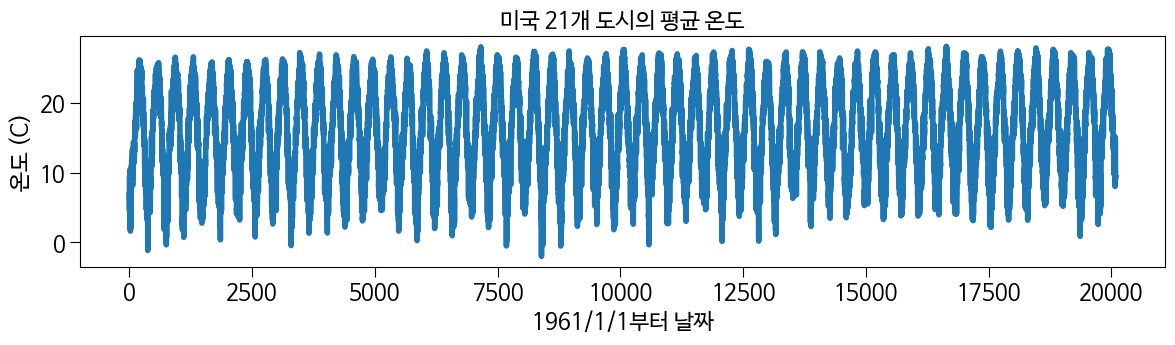

In [61]:
plt.figure(figsize = (14, 3)) #피겨 크기 지정
plt.plot(list(temperatures['Mean T'])) 
plt.title('미국 21개 도시의 평균 온도') 
plt.xlabel('1961/1/1부터 날짜') 
plt.ylabel('온도 (C)') 
plt.show()

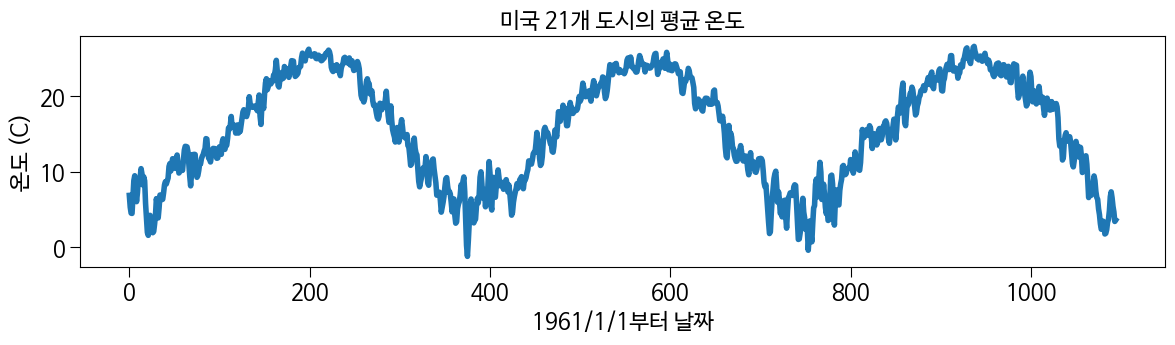

In [62]:
plt.figure(figsize = (14, 3)) #피겨 크기 지정
plt.plot(list(temperatures['Mean T'])[0:3*365])
plt.title('미국 21개 도시의 평균 온도') 
plt.xlabel('1961/1/1부터 날짜') 
plt.ylabel('온도 (C)') 
plt.show()

예제 23-2 연도와 온도 데이터를 매핑한 딕셔너리 만들기

In [63]:
def get_dict(temperatures, labels): 
    """temperatures는 데이터프레임입니다. 인덱스는 yyyymmdd 형태의 날짜를 나타내는 정수입니다.
       labels은 열 레이블의 리스트입니다.
       연도가 키이고, 값은 딕셔너리입니다.
       이 딕셔너리는 열 레이블이 키이고 각 열의 일자별 온도 리스트가 값입니다""" 
    year_dict = {} 
    for index, row in temperatures.iterrows(): 
        year = str(index)[0:4] 
        try: 
            for col in labels: 
                year_dict[year][col].append(row[col]) 
        except: 
            year_dict[year] = {col:[] for col in labels} 
            for col in labels: 
                year_dict[year][col].append(row[col]) 
    return year_dict 

예제 23-3 연도별 데이터프레임 만들기

In [64]:
import numpy as np 

temperatures = pd.read_csv('US_temperatures.csv') 
temperatures.set_index('Date', drop = True, inplace = True) 
temperatures['Mean T'] = round(temperatures.mean(axis = 'columns'), 2) 
temperatures['Max T'] = temperatures.max(axis = 'columns') 
temperatures['Min T'] = temperatures.min(axis = 'columns') 
yearly_dict = get_dict(temperatures, ['Max T', 'Min T', 'Mean T']) 
years, mins, maxes, means = [], [], [], [] 
for y in yearly_dict: 
    years.append(y) 
    mins.append(min(yearly_dict[y]['Min T'])) 
    maxes.append(max(yearly_dict[y]['Max T'])) 
    means.append(round(np.mean(yearly_dict[y]['Mean T']), 2)) 

yearly_temps = pd.DataFrame({'Year': years, 'Min T': mins, 
                             'Max T': maxes, 'Mean T': means}) 
print(yearly_temps) 

    Year  Min T  Max T  Mean T
0   1961 -17.25  38.05   15.64
1   1962 -21.65  36.95   15.39
2   1963 -24.70  36.10   15.50
..   ...    ...    ...     ...
52  2013 -15.00  40.55   16.66
53  2014 -22.70  40.30   16.85
54  2015 -18.80  40.55   17.54

[55 rows x 4 columns]


예제 23-4 연도별 온도 그래프 그리기

그림 23-2 평균 연간 온도와 최소 연간 온도

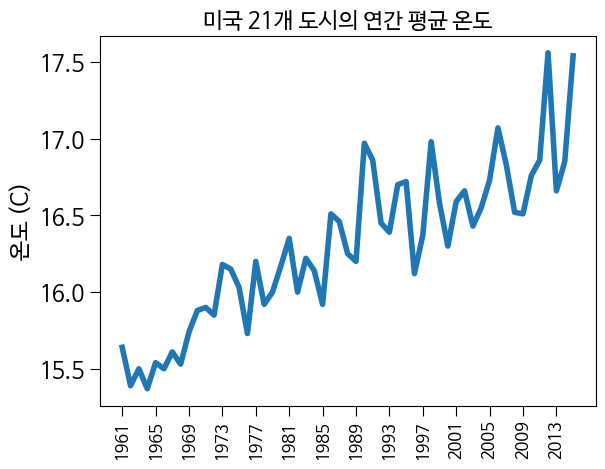

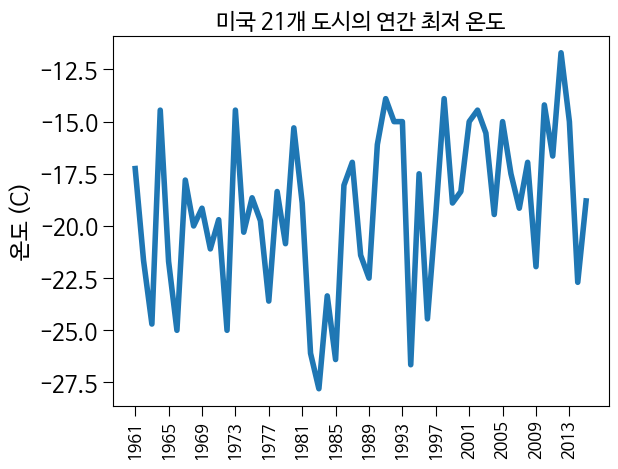

In [65]:
plt.figure(0) 
plt.plot(yearly_temps['Year'], yearly_temps['Mean T']) 
plt.title('미국 21개 도시의 연간 평균 온도') 
plt.figure(1) 
plt.plot(yearly_temps['Year'], yearly_temps['Min T']) 
plt.title('미국 21개 도시의 연간 최저 온도') 
for i in range(2): 
    plt.figure(i) 
    plt.xticks(range(0, len(yearly_temps), 4), 
               rotation = 'vertical', size = 'large') 
    plt.ylabel('온도 (C)') 

그림 23-3 최소 온도의 이동 평균

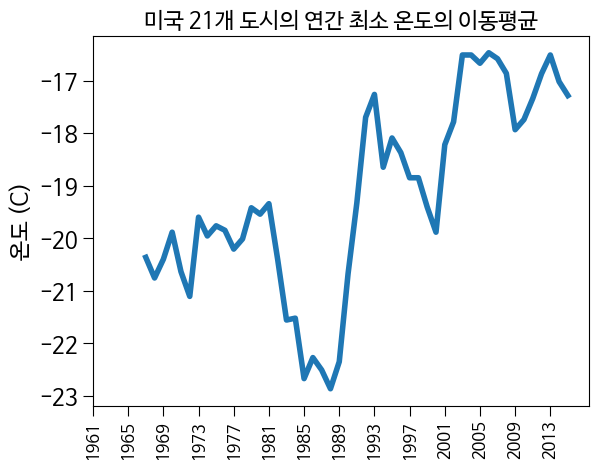

In [66]:
plt.plot(yearly_temps['Year'], yearly_temps['Min T'].rolling(7).mean()) 
plt.title('미국 21개 도시의 연간 최소 온도의 이동평균') 
plt.xticks(range(0, len(yearly_temps), 4), 
           rotation = 'vertical', size = 'large') 
plt.ylabel('온도 (C)') 
plt.show()

In [67]:
num_years = 7 
for label in ['Min T', 'Max T', 'Mean T']: 
    yearly_temps[label] = yearly_temps[label].rolling(num_years).mean() 
yearly_temps['Year'] = yearly_temps['Year'].apply(int) 
print(yearly_temps.corr()) 

            Year     Min T     Max T    Mean T
Year    1.000000  0.713382  0.918975  0.969475
Min T   0.713382  1.000000  0.629268  0.680766
Max T   0.918975  0.629268  1.000000  0.942378
Mean T  0.969475  0.680766  0.942378  1.000000


In [68]:
def r_squared(measured, predicted):
    """measured는 측정 값을 담은 1차원 배열이고
       predicted는 예측 값을 담은 1차원 배열이라고 가정합니다.
       결정 계수를 반환합니다"""
    estimated_error = ((predicted - measured)**2).sum()
    mean_of_measured = measured.sum()/len(measured)
    variability = ((measured - mean_of_measured)**2).sum()
    return 1 - estimated_error/variability

In [69]:
indices = np.isfinite(yearly_temps['Mean T']) 
model = np.polyfit(list(yearly_temps['Year'][indices]), 
                   list(yearly_temps['Mean T'][indices]), 1) 
print(r_squared(yearly_temps['Mean T'][indices], 
                np.polyval(model, yearly_temps['Year'][indices]))) 

0.9398819402644781


**뇌풀기 문제**

In [70]:
years_arr = np.array(years).astype(int)
yr_means_arr = np.array(means)
model = np.polyfit(years_arr, yr_means_arr, 1)
print(r_squared(yr_means_arr, np.polyval(model, years_arr)))

0.7738865414633711


예제 23-5 도시별 평균 온도

In [71]:
temperatures = pd.read_csv('US_temperatures.csv') 
temperatures.drop('Date', axis = 'columns', inplace = True) 
means = round(temperatures.mean(), 2) 
maxes = temperatures.max() 
mins = temperatures.min() 
city_temps = pd.DataFrame({'Min T':mins, 'Max T':maxes, 
                           'Mean T':means}) 
city_temps = city_temps.apply(lambda x: 1.8*x + 32) 
city_temps['Max-Min'] = city_temps['Max T'] -city_temps['Min T'] 
print(city_temps.sort_values('Mean T', ascending = False).to_string()) 

               Min T   Max T  Mean T  Max-Min
San Juan       68.99   88.97  80.492    19.98
Miami          37.94   90.05  76.604    52.11
Phoenix        32.45  106.52  73.904    74.07
Tampa          28.94   89.06  72.878    60.12
New Orleans    18.95   90.95  68.882    72.00
Las Vegas      19.49  105.98  67.964    86.49
Dallas          8.51   97.52  66.092    89.01
San Diego      43.07   92.03  64.130    48.96
Los Angeles    42.98   94.01  63.158    51.03
Charlotte       9.50   90.50  60.512    81.00
San Francisco  30.56   86.00  57.632    55.44
Albuquerque    -3.46   89.96  57.110    93.42
St Louis       -8.50   96.98  56.408   105.48
Baltimore      -0.04   93.47  55.562    93.51
Philadelphia    0.50   92.48  55.364    91.98
New York        3.56   91.04  54.194    87.48
Portland       11.03   89.96  54.068    78.93
Seattle        12.02   86.99  52.376    74.97
Boston          1.04   92.48  51.620    91.44
Chicago       -18.04   92.48  49.622   110.52
Detroit       -12.01   89.51  49.5

그림 23-4 도시별 온도 차이

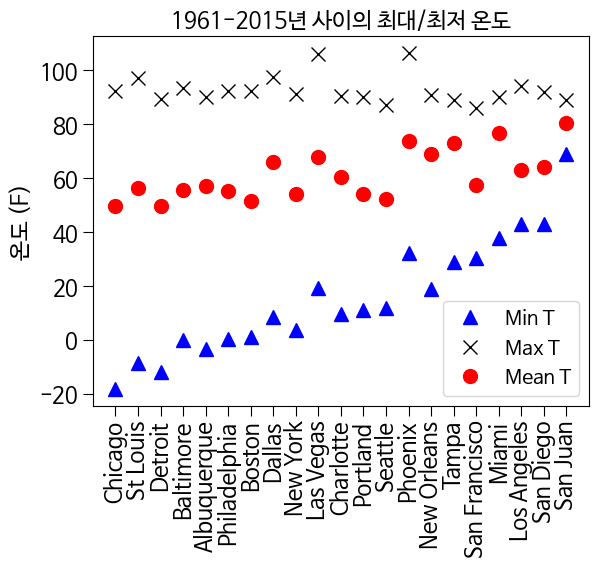

In [72]:
plt.plot(city_temps.sort_values('Max-Min', ascending=False)['Min T'], 
         'b^', label = 'Min T') 
plt.plot(city_temps.sort_values('Max-Min', ascending=False)['Max T'], 
         'kx', label = 'Max T') 
plt.plot(city_temps.sort_values('Max-Min', ascending=False)['Mean T'], 
         'ro', label = 'Mean T') 
plt.xticks(rotation = 'vertical') 
plt.legend() 
plt.title('1961-2015년 사이의 최대/최저 온도') 
plt.ylabel('온도 (F)') 
plt.show()

### 23.5.2 화석 연료 소비량

In [73]:
emissions = pd.read_csv('global-fossil-fuel-consumption.csv') 
print(emissions) 

    Year         Coal    Crude Oil   Natural Gas
0   1965  16151.96017  18054.69004   6306.370076
1   1966  16332.01679  19442.23715   6871.686791
2   1967  16071.18119  20830.13575   7377.525476
..   ...          ...          ...           ...
50  2015  43786.84580  52053.27008  34741.883490
51  2016  43101.23216  53001.86598  35741.829870
52  2017  43397.13549  53752.27638  36703.965870

[53 rows x 4 columns]


In [74]:
emissions['Fuels'] = emissions.sum(axis = 'columns') 
emissions.drop(['Coal', 'Crude Oil', 'Natural Gas'], axis = 'columns', 
               inplace = True) 
num_years = 5 
emissions['Roll F'] = emissions['Fuels'].rolling(num_years).mean() 
emissions = emissions.round() 

그림 23-5 전 세계 화석 연료 소비량

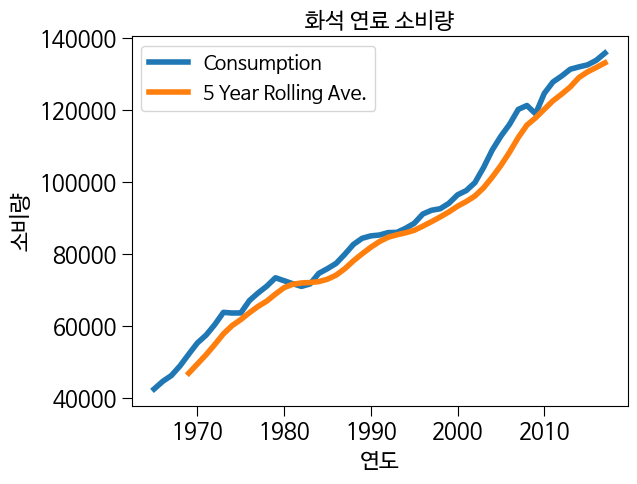

In [75]:
plt.plot(emissions['Year'], emissions['Fuels'], 
         label = 'Consumption') 
plt.plot(emissions['Year'], emissions['Roll F'], 
         label = str(num_years) + ' Year Rolling Ave.') 
plt.legend() 
plt.title('화석 연료 소비량') 
plt.xlabel('연도') 
plt.ylabel('소비량') 
plt.show()

In [76]:
temperatures = pd.read_csv('US_temperatures.csv') 
temperatures.set_index('Date', drop = True, inplace = True) 
temperatures['Mean T'] = round(temperatures.mean(axis = 'columns'), 2) 
temperatures['Max T'] = temperatures.max(axis = 'columns') 
temperatures['Min T'] = temperatures.min(axis = 'columns') 
yearly_dict = get_dict(temperatures, ['Max T', 'Min T', 'Mean T']) 
years, mins, maxes, means = [], [], [], [] 
for y in yearly_dict: 
    years.append(y) 
    mins.append(min(yearly_dict[y]['Min T'])) 
    maxes.append(max(yearly_dict[y]['Max T'])) 
    means.append(round(np.mean(yearly_dict[y]['Mean T']), 2)) 

yearly_temps = pd.DataFrame({'Year': years, 'Min T': mins, 
                             'Max T': maxes, 'Mean T': means}) 
print(yearly_temps) 

    Year  Min T  Max T  Mean T
0   1961 -17.25  38.05   15.64
1   1962 -21.65  36.95   15.39
2   1963 -24.70  36.10   15.50
..   ...    ...    ...     ...
52  2013 -15.00  40.55   16.66
53  2014 -22.70  40.30   16.85
54  2015 -18.80  40.55   17.54

[55 rows x 4 columns]


In [77]:
yearly_temps['Year'] = yearly_temps['Year'].astype(int) 
merged_df = pd.merge(yearly_temps, emissions, 
                     left_on = 'Year', right_on = 'Year') 
print(merged_df) 

    Year  Min T  ...     Fuels    Roll F
0   1965  -21.7  ...   42478.0       NaN
1   1966  -25.0  ...   44612.0       NaN
2   1967  -17.8  ...   46246.0       NaN
..   ...    ...  ...       ...       ...
48  2013  -15.0  ...  131379.0  126466.0
49  2014  -22.7  ...  132028.0  129072.0
50  2015  -18.8  ...  132597.0  130662.0

[51 rows x 6 columns]


In [78]:
print(merged_df.corr().round(2).to_string())

        Year  Min T  Max T  Mean T  Fuels  Roll F
Year    1.00   0.37   0.72    0.85   0.99    0.98
Min T   0.37   1.00   0.22    0.49   0.37    0.33
Max T   0.72   0.22   1.00    0.70   0.75    0.66
Mean T  0.85   0.49   0.70    1.00   0.85    0.81
Fuels   0.99   0.37   0.75    0.85   1.00    1.00
Roll F  0.98   0.33   0.66    0.81   1.00    1.00
